# РК ИУ5-61Б Гапчук Л.Д.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
parts = np.split(data, [15], axis=1)
data = parts[0]

In [5]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [6]:
data.drop(['ca','fbs'], axis = 1, inplace = True)

In [7]:
le = LabelEncoder()
le.fit(data.age.drop_duplicates()) 
data.age = le.transform(data.age)

In [8]:
data.isnull().sum()
# проверим есть ли пропущенные значения

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   restecg   303 non-null    float64
 6   thalach   303 non-null    float64
 7   exang     303 non-null    float64
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    float64
 10  thal      303 non-null    float64
 11  target    303 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 28.5 KB


In [10]:
data.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
0,29,1.0,3.0,145.0,233.0,0.0,150.0,0.0,2.3,0.0,1.0,1.0
1,3,1.0,2.0,130.0,250.0,1.0,187.0,0.0,3.5,0.0,2.0,1.0
2,7,0.0,1.0,130.0,204.0,0.0,172.0,0.0,1.4,2.0,2.0,1.0
3,22,1.0,1.0,120.0,236.0,1.0,178.0,0.0,0.8,2.0,2.0,1.0
4,23,0.0,0.0,120.0,354.0,1.0,163.0,1.0,0.6,2.0,2.0,1.0


<AxesSubplot:>

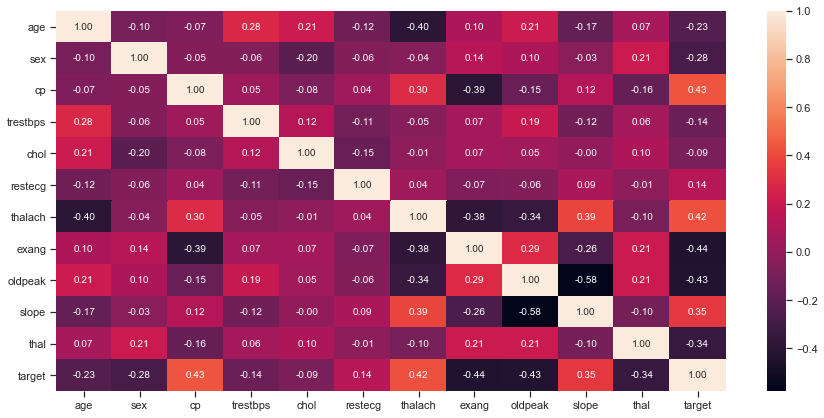

In [11]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [12]:
X = data.drop(['target'], axis = 1)
Y = data.target
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    age  sex   cp  trestbps   chol  restecg  thalach  exang  oldpeak  slope  \
0   29  1.0  3.0     145.0  233.0      0.0    150.0    0.0      2.3    0.0   
1    3  1.0  2.0     130.0  250.0      1.0    187.0    0.0      3.5    0.0   
2    7  0.0  1.0     130.0  204.0      0.0    172.0    0.0      1.4    2.0   
3   22  1.0  1.0     120.0  236.0      1.0    178.0    0.0      0.8    2.0   
4   23  0.0  0.0     120.0  354.0      1.0    163.0    1.0      0.6    2.0   

   thal  
0   1.0  
1   2.0  
2   2.0  
3   2.0  
4   2.0   

Выходные данные:

 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64


In [13]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      age  sex   cp  trestbps   chol  restecg  thalach  exang  oldpeak  slope  \
255   11  1.0  0.0     142.0  309.0      0.0    147.0    1.0      0.0    1.0   
134    7  0.0  1.0     126.0  306.0      1.0    163.0    0.0      0.0    2.0   
8     18  1.0  2.0     172.0  199.0      1.0    162.0    0.0      0.5    2.0   
157    2  1.0  1.0     122.0  192.0      1.0    174.0    0.0      0.0    2.0   
241   25  0.0  0.0     174.0  249.0      1.0    143.0    1.0      0.0    1.0   

     thal  
255   3.0  
134   2.0  
8     3.0  
157   2.0  
241   2.0   

Входные параметры тестовой выборки:

      age  sex   cp  trestbps   chol  restecg  thalach  exang  oldpeak  slope  \
225   36  1.0  0.0     145.0  174.0      1.0    125.0    1.0      2.6    0.0   
152   30  1.0  3.0     170.0  227.0      0.0    155.0    0.0      0.6    1.0   
228   25  1.0  3.0     170.0  288.0      0.0    159.0    0.0      0.2    1.0   
201   26  1.0  0.0     125.0  258.0      0.0    

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [15]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 0.2740923002886657
Средняя квадратичная ошибка: 0.10656592241045719
Median absolute error: 0.27034689605737405
Коэффициент детерминации: 0.5697065065695404


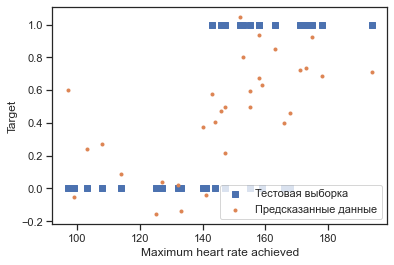

In [16]:
plt.scatter(X_test.thalach, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.thalach, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Maximum heart rate achieved')
plt.ylabel ('Target')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [19]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.09677419354838711
Средняя квадратичная ошибка: 0.027096774193548386
Median absolute error: 0.0
Коэффициент детерминации: 0.8905882352941176


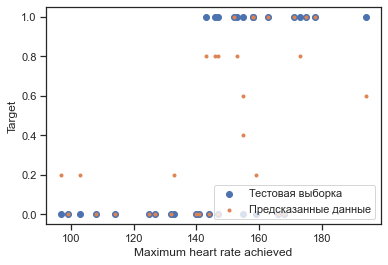

In [20]:
plt.scatter(X_test.thalach, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.thalach, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Target')
plt.show()